# OPTENINJECTION DAY 1
# Ekstraksi Ciri Local Binary Pattern

In [2]:
# import library yang diperlukan
import numpy as np
import cv2

## Deklarasi Fungsi

In [14]:
def calc_lbp(img):
    # membuat matriks pengali
    pengali = [128, 64, 32, 1, 0, 16, 2, 4, 8]
    
    # membuat padding
    imgBaru = np.pad(img, [3,3], mode='constant')
    
    # membuat matriks hist
    hist = np.zeros((256,1))
    kotak = [0, 0, 0, 0, 0, 0, 0, 0, 0] # ukuran 3x3
    
    #perhitungan LBP
    for i in range(0, len(img)):
        for j in range(0, len(img)):
            kotakbanding = imgBaru[i:i+7, j:j+7]
            titiktengah = kotakbanding[3,3]
            # bandingkan nilai dengan titik tengah
            kotak[0] = (nolsatu(titiktengah < kotakbanding[0,0]))
            kotak[1] = (nolsatu(titiktengah < kotakbanding[0,3]))
            kotak[2] = (nolsatu(titiktengah < kotakbanding[0,6]))
            kotak[3] = (nolsatu(titiktengah < kotakbanding[3,0]))
            kotak[4] = (nolsatu(titiktengah < titiktengah))
            kotak[5] = (nolsatu(titiktengah < kotakbanding[3,6]))
            kotak[6] = (nolsatu(titiktengah < kotakbanding[6,0]))
            kotak[7] = (nolsatu(titiktengah < kotakbanding[6,3]))
            kotak[8] = (nolsatu(titiktengah < kotakbanding[6,6]))
            
            # ubah biner ke desimal
            kali = np.multiply(pengali, kotak)
            binary2desimal = np.sum(kali)
            
            # tambah nilai histogram
            hist[binary2desimal] += 1
            
    # normalisasi histogram
    fiturhist = hist.ravel() # matriks digabung
    
    (histeg, _) = np.histogram(fiturhist, bins=np.arange(0,27), range=(0,26))
    eps = 1e-7
        
    histeg = histeg.astype("float")
    histeg /= (histeg.sum() + eps)
        
    return fiturhist, histeg

def nolsatu(nilai):
    if nilai == True:
        return 1
    else:
        return 0

In [15]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


## Implementasi LBP pada salah satu gambar anjing dan kucing

<function matplotlib.pyplot.show(*args, **kw)>

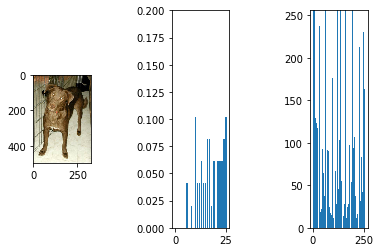

In [31]:
# path gambar disesuaikan dengan lokasi data masing-masing
imgdog = mpimg.imread("cats_and_dogs_filtered/train/dogs/dog."+str(1)+".jpg")
imgcat = mpimg.imread("cats_and_dogs_filtered/train/cats/cat."+str(0)+".jpg")

############################# plot gambar dog #############################
fig, axs = plt.subplots(1,5) # 3 gambar
img_ori_dog = np.asarray(imgdog)
axs[0].imshow(imgdog)
plt.show
axs[1].remove()

# ubah gambar ke grayscale
img_ori_dog = cv2.cvtColor(img_ori_dog, cv2.COLOR_BGR2GRAY)

# resize gambar (jika diperlukan)
img_ori_dog = cv2.resize(img_ori_dog, (200,200))

# hitung histogram
histdog, histnorm_dog = calc_lbp(img_ori_dog)

# visualisasi histogram
x = np.arange(len(histnorm_dog)) # yang digunakan histogram setelah normalisasi
w = .8
axs[2].set_ylim(0,0.2)
axs[2].bar(x, histnorm_dog, width=w)
plt.show
axs[3].remove()
x = np.arange(len(histdog)) # yang digunakan histogram sebelum normalisasi
axs[4].set_ylim(0,256)
axs[4].bar(x, histdog, width=w)
plt.show
############################# end plot #############################

<function matplotlib.pyplot.show(*args, **kw)>

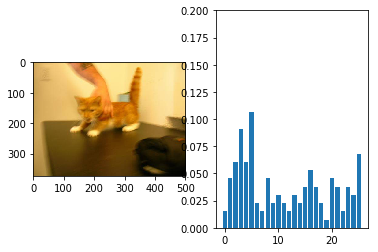

In [22]:
####################### plot gambar cat #############################
fig, axs = plt.subplots(1,2) # 3 gambar
img_ori_cat = np.asarray(imgcat)
axs[0].imshow(imgcat)
plt.show

# ubah gambar ke grayscale
img_ori_cat = cv2.cvtColor(img_ori_cat, cv2.COLOR_BGR2GRAY)

# resize gambar (jika diperlukan)
img_ori_cat = cv2.resize(img_ori_cat, (200,200))

# hitung histogram
histcat, histnorm_cat = calc_lbp(img_ori_cat)

x = np.arange(len(histnorm_cat)) # yang digunakan histogram setelah normalisasi
w = .8
# axs[1].set_ylim(0,0.2)
# axs[1].bar(x, histcat, width=w)
# plt.show
axs[1].set_ylim(0,0.2)
axs[1].bar(x, histnorm_cat, width=w)
plt.show
############################# end plot #############################

## Implementasi LBP pada semua dataset

## Data Training 

In [ ]:
# histogram of LBP

# Data Training
# histogram
x_dog = []
# label
y_dog = []

# histogram
x_cat = []
# label
y_cat = []

# Membaca gambar kemudian di ubah ke grayscale
for i in range(0, 1000):
    img_ori_dog = np.asarray(cv2.imread("cats_and_dogs_filtered/train/dogs/dog." + str(i) + ".jpg"))

    # Ubah gambar ke grayscale
    img_ori_dog = cv2.cvtColor(img_ori_dog, cv2.COLOR_BGR2GRAY)

    # Ubah ukuran gambar menjadi 200 x 200
    img_ori_dog = cv2.resize(img_ori_dog,(200,200))

    # histogram
    # histogram yang digunakan untuk klasifikasi adalah histogram yang belum di normalisasi (histg_dog)
    histg_dog, histnorm_dog = calc_lbp(img_ori_dog)
    x_dog.append(histg_dog)
    # label
    y_dog.append('dog')

    img_ori_cat = np.asarray(cv2.imread("cats_and_dogs_filtered/train/cats/cat."+ str(i) +".jpg"))

    # Ubah gambar ke grayscale
    img_ori_cat = cv2.cvtColor(img_ori_cat, cv2.COLOR_BGR2GRAY)

    # Ubah ukuran gambar menjadi 200 x 200
    img_ori_cat = cv2.resize(img_ori_cat,(200,200))

    # histogram
    # histogram yang digunakan untuk klasifikasi adalah histogram yang belum di normalisasi (histg_cat)
    histg_cat, histnorm_cat = calc_lbp(img_ori_cat)
    x_cat.append(calc_lbp(img_ori_cat))
    # label
    y_cat.append('cat')

## Data Validasi

In [ ]:
# Data Validasi
# histogram
x_dog_val = []
# label
y_dog_val = []

# histogram
x_cat_val = []
# label
y_cat_val = []

for i in range(0, 500):
    img_ori_dog_val = np.asarray(cv2.imread("cats_and_dogs_filtered/validation/dogs/dog."+str(i)+".jpg"))

    # Ubah gambar ke grayscale
    img_ori_dog_val = cv2.cvtColor(img_ori_dog_val, cv2.COLOR_BGR2GRAY)

    # Ubah ukuran gambar menjadi 200 x 200
    img_ori_dog_val = cv2.resize(img_ori_dog_val,(200,200))

    # histogram
    # histogram yang digunakan untuk klasifikasi adalah histogram yang belum di normalisasi (histg_dog_val)
    histg_dog_val, histnorm_dog_val = calc_lbp(img_ori_dog_val)
    x_dog_val.append(histg_dog_val)
    # label
    y_dog_val.append('dog')

    img_ori_cat_val = np.asarray(cv2.imread("cats_and_dogs_filtered/validation/cats/cat."+str(i)+".jpg"))

    # Ubah gambar ke grayscale
    img_ori_cat_val = cv2.cvtColor(img_ori_cat_val, cv2.COLOR_BGR2GRAY)

    # Ubah ukuran gambar menjadi 200 x 200
    img_ori_cat_val = cv2.resize(img_ori_cat_val,(200,200))

    # histgram
    # histogram yang digunakan untuk klasifikasi adalah histogram yang belum di normalisasi (histg_cat_val)
    histg_cat_val, histnorm_cat_val = calc_lbp(img_ori_cat_val)
    x_cat_val.append(calc_lbp(img_ori_cat_val))
    # label
    y_cat_val.append('cat')

In [ ]:
# gabungkan histogram dari data training gambar anjing dan kucing
x_train = np.concatenate((x_dog,x_cat))
y_train = np.concatenate((y_dog,y_cat))

# gabungkan histogram dari data validasi gambar anjing dan kucing
x_val = np.concatenate((x_dog_val,x_cat_val))
y_val = np.concatenate((y_dog_val,y_cat_val))

## Simpan Histogram dan Labelnya

In [ ]:
np.save("x_train.npy",x_train)
np.save("y_train.npy",y_train)
np.save("x_val.npy",x_val)
np.save("y_val.npy",y_val)

print ('files saved')